In [36]:
import pandas as pd
import numpy as np
import glob
import os

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
path_files = r'./tirages/*.csv'

In [3]:
all_files = glob.glob(path_files)





#filename = all_files[0]

df_list = []

for filename in all_files:
    df = pd.read_csv(filename, sep=';', parse_dates=['date_de_tirage'], dayfirst=True)
    
    df = df[["date_de_tirage", "boule_1", "boule_2", "boule_3", "boule_4", "boule_5", "numero_chance"]]
    
    df.rename(columns={
        'date_de_tirage': 'date_tirage',
        'boule_1': 'num0',
        'boule_2':'num1', 
        "boule_3": "num2", 
        "boule_4": "num3", 
        "boule_5": "num4", 
        "numero_chance": "chance"},inplace=True)
    print(df.shape)
    df_list.append(df)
    #break;

df = pd.concat(df_list)

# placer le dernier tirage en dernière position
df.sort_values('date_tirage', ascending = True, inplace=True)
df.shape

(4858, 7)
(310, 7)
(107, 7)
(455, 7)
(1317, 7)


(7047, 7)

In [4]:
df.head()

,date_tirage,num0,num1,num2,num3,num4,chance
4857,1976-05-19,31,15,33,27,36,34
4856,1976-06-03,10,26,42,1,4,31
4855,1976-06-10,44,16,47,10,15,27
4854,1976-06-16,2,3,35,13,1,49
4853,1976-06-23,30,22,11,9,23,49


In [5]:
df.tail()

,date_tirage,num0,num1,num2,num3,num4,chance
4,2022-09-19,5,7,44,15,33,1
3,2022-09-21,3,12,22,9,37,10
2,2022-09-24,25,6,32,7,4,10
1,2022-09-26,29,49,35,18,39,1
0,2022-09-28,12,39,26,14,29,10


In [6]:
df = df[["num0", "num1", "num2", "num3", "num4", "chance"]]
df.head()

,num0,num1,num2,num3,num4,chance
4857,31,15,33,27,36,34
4856,10,26,42,1,4,31
4855,44,16,47,10,15,27
4854,2,3,35,13,1,49
4853,30,22,11,9,23,49


https://github.com/berba1995/Deep_Learning_et_le_Hasard/blob/main/DEEP_LEARNING_ET_LE_HASARD.ipynb

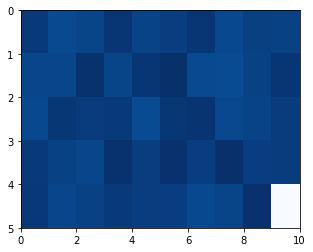

In [7]:
#fonction de vérification de nombres en dessous d'une certaine valeur pour les 5 premiers numéros, sauf celui de chance
def is_under(data, number):
    return ((data['num0'] <= number).astype(int) + 
            (data['num1'] <= number).astype(int) +
            (data['num2'] <= number).astype(int) +
            (data['num3'] <= number).astype(int) +
            (data['num4'] <= number).astype(int))

#fonction de vérification de nombres pairs pour les 5 premiers numéros sauf celui de chance
def is_pair(data):
    return ((data['num0'].isin(pairs)).astype(int) + 
            (data['num1'].isin(pairs)).astype(int) +
            (data['num2'].isin(pairs)).astype(int) +
            (data['num3'].isin(pairs)).astype(int) +
            (data['num4'].isin(pairs)).astype(int))

#fonction de vérification de nombres impairs pour les 5 premiers numéros sauf celui de chance
def is_impair(data):
    return ((data['num0'].isin(impairs)).astype(int) + 
            (data['num1'].isin(impairs)).astype(int) +
            (data['num2'].isin(impairs)).astype(int) +
            (data['num3'].isin(impairs)).astype(int) +
            (data['num4'].isin(impairs)).astype(int))

#fonction de vérification de nombres pairs pour le numéro de chance
def is_pair_etoile(data):
    return (data['chance'].isin(pairs)).astype(int)

#fonction de vérification de nombres impairs pour le numéro de chance
def is_impair_etoile(data):
    return (data['chance'].isin(impairs)).astype(int)

#liste de nombres pairs et impairs
pairs = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
impairs = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]

#Fonction de calcul de la somme de la différence au carré des 5 premiers numéros, sauf celui de chance
def sum_diff(data):
    return ((data['num1'] - data['num0'])**2 + 
            (data['num2'] - data['num1'])**2 +
            (data['num3'] - data['num2'])**2 +
            (data['num4'] - data['num3'])**2)


# Calcul de la fréquence de tirage de chaque numéro
freqs = []
for val in range(50):
    count = ( (df['num0'] == val+1).sum() +
              (df['num1'] == val+1).sum() +
              (df['num2'] == val+1).sum() +
              (df['num3'] == val+1).sum() +
              (df['num4'] == val+1).sum() )
    freqs.append(count)
ax = plt.gca() ;  ax.invert_yaxis()
plt.gcf().set_size_inches(5, 4)
heatmap = plt.pcolor(np.reshape(np.array(freqs), (5, 10)), cmap=plt.cm.Blues)

def freq_val(data, column):
    tab = data[column].values.tolist()
    freqs = []
    pos = 1
    for e in tab:
        freqs.append(tab[0:pos].count(e))
        pos = pos + 1
    return freqs



#df['sum'] = ((df.num0 + df.num1 + df.num2 + df.num3 + df.num4 + df.chance ) >185).astype(int)


In [8]:
#ajout de la difference entre les numéros(A explorer ASAp)
#for i in range(4):
    #print(i,i+1)
    #df['diff_{}'.format(i)]=df['num{}'.format(i+1)]-df['num{}'.format(i)]
#application des fonctions sur le dataframe
df['freq_num0'] = freq_val(df, 'num0')
df['freq_num1'] = freq_val(df, 'num1')
df['freq_num2'] = freq_val(df, 'num2')
df['freq_num3'] = freq_val(df, 'num3')
df['freq_num4'] = freq_val(df, 'num4')
df['freq_chance'] = freq_val(df, 'chance')#calcul des frequences 
df['sum_diff'] = sum_diff(df)#somme de la différence au carré entre chaque couple de numéros successifs dans le tirage
df['pair_chance'] = is_pair_etoile(df)
df['impair_chance'] = is_impair_etoile(df)
df['pair'] = is_pair(df)
df['impair'] = is_impair(df)#verification de nombre pair et impair
df['is_under_24'] = is_under(df, 24)  # Les numeros en dessous de 24 
df['is_under_40'] = is_under(df, 40)# Les numeros en dessous de 40 
df.head(6)

,num0,num1,num2,num3,num4,chance,freq_num0,freq_num1,freq_num2,freq_num3,freq_num4,freq_chance,sum_diff,pair_chance,impair_chance,pair,impair,is_under_24,is_under_40
4857,31,15,33,27,36,34,1,1,1,1,1,1,697,1,0,1,4,1,5
4856,10,26,42,1,4,31,1,1,1,1,1,1,2202,0,1,4,1,3,4
4855,44,16,47,10,15,27,1,1,1,1,1,1,3139,0,1,3,2,3,3
4854,2,3,35,13,1,49,1,1,1,1,1,1,1653,0,1,1,4,4,5
4853,30,22,11,9,23,49,1,1,1,1,1,2,385,0,1,2,3,4,5
4852,10,17,25,35,5,1,2,1,1,1,1,1,1113,0,1,1,4,3,5


In [9]:
#Params du modèle
nb_label_feature=6

window_length =12 #12 
number_of_features = df.shape[1]

In [34]:
# Fonction de formatage des données en entrée du modèle
def loto_dataset(df, window_length,nb_label_feature, scaled = True):
    number_of_rows = df.shape[0]   #taille du dataset number_of_features
    number_of_features = df.shape[1]
    
    scaler = None
    
    if scaled:
        scaler = StandardScaler().fit(df.values)
        transformed_dataset = scaler.transform(df.values)
        df = pd.DataFrame(data=transformed_dataset, index=df.index)

    train = np.empty([number_of_rows-window_length, window_length, number_of_features], dtype=float)
    
    label = np.empty([number_of_rows-window_length, nb_label_feature], dtype=float)
    for i in range(0, number_of_rows-window_length):
        train[i] = df.iloc[i:i+window_length, 0: number_of_features]
        label[i] = df.iloc[i+window_length: i+window_length+1, 0:nb_label_feature]
        

        
    return train, label, scaler

In [35]:
X, y, scaler = loto_dataset(df, window_length,nb_label_feature, scaled = True)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4713, 12, 19) (2322, 12, 19) (4713, 6) (2322, 6)


In [39]:
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [56]:
batch_size = 32
epochs = 40

### Réseau Dense

In [72]:
dense = Sequential()
dense_0 = Flatten()
dense_1 = Dense(units = 500, input_dim = 4713, kernel_initializer ='normal', activation ='tanh')
dense_2 = Dense(units = 6, kernel_initializer ='normal', activation ='softmax')
dense.add(dense_0)
dense.add(dense_1)
dense.add(dense_2)

In [73]:
dense.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])   

In [74]:
training_history_dense = dense.fit(X_train, y_train, validation_split = 0.2, epochs = epochs, batch_size = batch_size, verbose = 1)

Epoch 1/40
118/118 [==============================] - 2s 10ms/step - loss: -2.8039 - accuracy: 0.2279 - val_loss: -5.1662 - val_accuracy: 0.2206
Epoch 2/40
118/118 [==============================] - 1s 6ms/step - loss: -5.8982 - accuracy: 0.2456 - val_loss: -7.5037 - val_accuracy: 0.2089
Epoch 3/40
118/118 [==============================] - 1s 6ms/step - loss: -10.5978 - accuracy: 0.2488 - val_loss: -15.3661 - val_accuracy: 0.2057
Epoch 4/40
118/118 [==============================] - 1s 6ms/step - loss: -16.5316 - accuracy: 0.2438 - val_loss: -21.8107 - val_accuracy: 0.2047
Epoch 5/40
118/118 [==============================] - 1s 7ms/step - loss: -21.5008 - accuracy: 0.2504 - val_loss: -30.1595 - val_accuracy: 0.2100
Epoch 6/40
118/118 [==============================] - 1s 6ms/step - loss: -27.3170 - accuracy: 0.2363 - val_loss: -33.7170 - val_accuracy: 0.2025
Epoch 7/40
118/118 [==============================] - 1s 7ms/step - loss: -31.2569 - accuracy: 0.2358 - val_loss: -39.7035 - va

In [75]:
val_acc_dense = training_history_dense.history['val_accuracy']

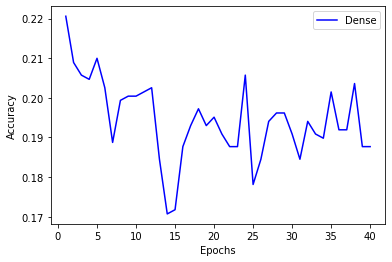

In [76]:
# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe du score de validation du réseau Dense
plt.plot(np.arange(1 , epochs+1, 1),
         val_acc_dense,
         label = 'Dense',
         color = 'blue')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()